In [15]:
from pathlib import Path
from environs import Env
import geopandas as gpd
import contextily

from streetscapes.sources import Mapillary
from streetscapes.streetview import SVWorkspace

In [16]:
env = Env()
env.read_env(".env")
city = "Amsterdam"

In [17]:
hf_path = Path(env.path("HF_HOME"), city)
ws = SVWorkspace(hf_path)
mp = Mapillary(ws.env, root_dir=hf_path)
mp

Mapillary(root_dir='/gpfs/work4/0/prjs0914/streetscapes/Amsterdam')

In [18]:
bbox = [4.7,52.25,5.1,52.5]
df = mp.fetch_image_ids(bbox=bbox, limit=100)

In [19]:
pdf = df.to_pandas()
gdf = gpd.GeoDataFrame(pdf, geometry=gpd.points_from_xy(pdf.lon, pdf.lat))
gdf.set_crs("EPSG:4326", allow_override=True, inplace=True)
gdf

,id,altitude,atomic_scale,camera_type,captured_at,compass_angle,computed_altitude,computed_compass_angle,computed_geometry,computed_rotation,...,make,model,thumb_256_url,thumb_1024_url,thumb_2048_url,thumb_original_url,sequence,width,lon,lat
0,2546220742409803,-0.500000,2.264240,perspective,1747204313820,296.110000,13.136054,316.972861,"{'coordinates': [5.0941571982306, 52.318048645...","[1.3648162011605, 0.54004841738347, -0.6123870...",...,GoPro,HERO13 Black,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,aJxGt5KqrpY1bj26kRAWyw,3840,5.094157,52.318049
1,2474255176089460,0.000000,1.012371,perspective,1702710283945,114.461639,1.970850,120.469741,"{'coordinates': [5.1001465335301, 52.316144150...","[0.91244967842944, -1.491756054107, 1.68966763...",...,samsung,SM-A515F,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,kvrScIdAO7RVzXPpMj1sQE,4000,5.100147,52.316144
2,2456549124687992,-9.686008,0.995287,spherical,1734081904420,307.225990,2.098954,303.572607,"{'coordinates': [5.0503114872579, 52.251884785...","[1.4855335926183, 0.77642748462797, -0.7696179...",...,GoPro,GoPro Max,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,8lu7M3CeHdoLSmyQnZ0JAD,4096,5.050311,52.251885
3,2616010468751698,6.200000,3.773752,perspective,1745996683720,296.400000,-9.524777,280.574183,"{'coordinates': [5.0991390627183, 52.317124335...","[1.2925623930252, 1.0407001322483, -1.10450025...",...,GoPro,HERO9 Black,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,6lzhDEvc19frSNIiyMUpoV,3840,5.099139,52.317124
4,2406982463002974,0.000000,0.980535,perspective,1738503921000,77.162493,10.223121,76.019961,"{'coordinates': [5.0796102518085, 52.291050844...","[1.2298403779331, -0.93180284548396, 1.0985882...",...,none,none,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,291g3k7vn5MHTYWKPGRxlp,3840,5.079610,52.291051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9828294967264937,0.000000,0.995672,perspective,1748682720100,12.663173,2.317433,193.949322,"{'coordinates': [5.0304828025487, 52.455952889...","[0.28398548893263, 1.9650269793921, -2.2381283...",...,none,none,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,rUeNghTdu6FjPsGEkIt80B,2560,5.030483,52.455953
96,30732311233034339,-5.750000,1.081331,perspective,1748675264700,2.550000,-15.344628,2.799135,"{'coordinates': [5.0306053408083, 52.491393280...","[1.427907635628, -0.048427852990284, 0.0246352...",...,GoPro,HERO13 Black,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,XrdBKogTWR9P0mZYQtnF2G,3840,5.030605,52.491393
97,9966779916749198,7.940000,1.087503,perspective,1748679997880,21.350000,14.001319,187.312950,"{'coordinates': [5.0316472108256, 52.464057525...","[0.098047564004431, 2.1128505309984, -2.162980...",...,GoPro,HERO9 Black,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/A...,https://scontent-ams2-1.xx.fbcdn.net/m1/v/t6/

/scratch-local/cdonnely.13177848/ipykernel_2637385/376806489.py:1: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  ax = gdf.plot(column='uuid', color='red', markersize=3, figsize=(6, 6), alpha=0.5)


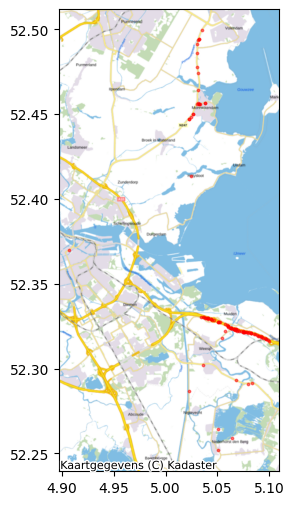

In [20]:
ax = gdf.plot(column='uuid', color='red', markersize=3, figsize=(6, 6), alpha=0.5)
contextily.add_basemap(ax, crs=gdf.crs, source=contextily.providers.nlmaps.standaard)

In [21]:
image_ids = gdf.id
urls = gdf.thumb_1024_url
paths = mp.download_images(image_ids, urls)